In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import sklearn.metrics as metrics

from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [87]:
df_original = pd.read_csv('Invistico_Airline.csv')
pd.set_option('display.max_columns', None)

In [88]:
df_original.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26.0


In [89]:
df_original.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [90]:
df_original['satisfaction'].value_counts()

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

In [91]:
df_original.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [92]:
df_original.duplicated().sum()

0

In [93]:
df_original.shape

(129880, 22)

In [94]:
df_subset = df_original.dropna()

In [95]:
df_subset.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [96]:
df_subset.shape

(129487, 22)

In [97]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight Distance                    129487 non-null  int64  
 6   Seat comfort                       129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Food and drink                     129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Inflight wifi service              129487 non-null  int64  
 11  Inflight entertainment             129487 no

In [98]:
df_subset['satisfaction'] = df_subset['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})

C:\Users\User\AppData\Local\Temp\ipykernel_35960\2396829040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['satisfaction'] = df_subset['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})


In [99]:
df_subset['Class'] = df_subset['Class'].map({'Eco': 1, 'Business': 3,'Eco Plus': 2})

C:\Users\User\AppData\Local\Temp\ipykernel_35960\2088948437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Class'] = df_subset['Class'].map({'Eco': 1, 'Business': 3,'Eco Plus': 2})


In [100]:
print(df_original['Customer Type'].unique(), df_original['Type of Travel'].unique(), df_original['Class'].unique())

['Loyal Customer' 'disloyal Customer'] ['Personal Travel' 'Business travel'] ['Eco' 'Business' 'Eco Plus']


In [101]:
df_subset = pd.get_dummies(df_subset, drop_first=True, dtype=int)
df_subset.head()

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,1,65,1,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,0,1
1,1,47,3,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,0,1
2,1,15,1,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,0,1
3,1,60,1,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,0,1
4,1,70,1,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,0,1


In [102]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  int64  
 1   Age                                129487 non-null  int64  
 2   Class                              129487 non-null  int64  
 3   Flight Distance                    129487 non-null  int64  
 4   Seat comfort                       129487 non-null  int64  
 5   Departure/Arrival time convenient  129487 non-null  int64  
 6   Food and drink                     129487 non-null  int64  
 7   Gate location                      129487 non-null  int64  
 8   Inflight wifi service              129487 non-null  int64  
 9   Inflight entertainment             129487 non-null  int64  
 10  Online support                     129487 non-null  int64  
 11  Ease of Online booking             129487 no

In [103]:
X = df_subset.copy()
X = df_subset.drop('satisfaction', axis = 1)
y = df_subset['satisfaction']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0 )

In [105]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)

In [106]:
print('Accuracy :', '%0.4f'% metrics.accuracy_score(y_test, dt_pred))
print('Precision :', '%0.4f'% metrics.precision_score(y_test, dt_pred))
print('Recall :', '%0.4f'% metrics.recall_score(y_test, dt_pred))
print('F1_score :', '%0.4f'% metrics.f1_score(y_test, dt_pred))

Accuracy : 0.9354
Precision : 0.9429
Recall : 0.9390
F1_score : 0.9409


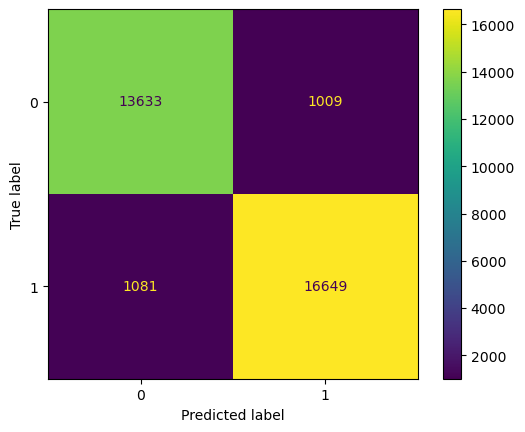

In [107]:
cm = metrics.confusion_matrix(y_test, dt_pred, labels=decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree.classes_)
disp.plot()

[Text(0.5, 0.875, 'Inflight entertainment <= 3.5\ngini = 0.496\nsamples = 97115\nvalue = [43963, 53152]'),
 Text(0.25, 0.625, 'Seat comfort <= 3.5\ngini = 0.339\nsamples = 43502\nvalue = [34098, 9404]'),
 Text(0.125, 0.375, 'Seat comfort <= 0.5\ngini = 0.247\nsamples = 38022\nvalue = [32531, 5491]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Seat comfort <= 4.5\ngini = 0.408\nsamples = 5480\nvalue = [1567, 3913]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Ease of Online booking <= 3.5\ngini = 0.3\nsamples = 53613\nvalue = [9865, 43748]'),
 Text(0.625, 0.375, 'Inflight entertainment <= 4.5\ngini = 0.485\nsamples = 14645\nvalue = [6063, 8582]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Customer Type_disloyal Customer <= 0.5\ngini = 0.176\nsamples = 38968\nvalue = [3802, 35166]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),


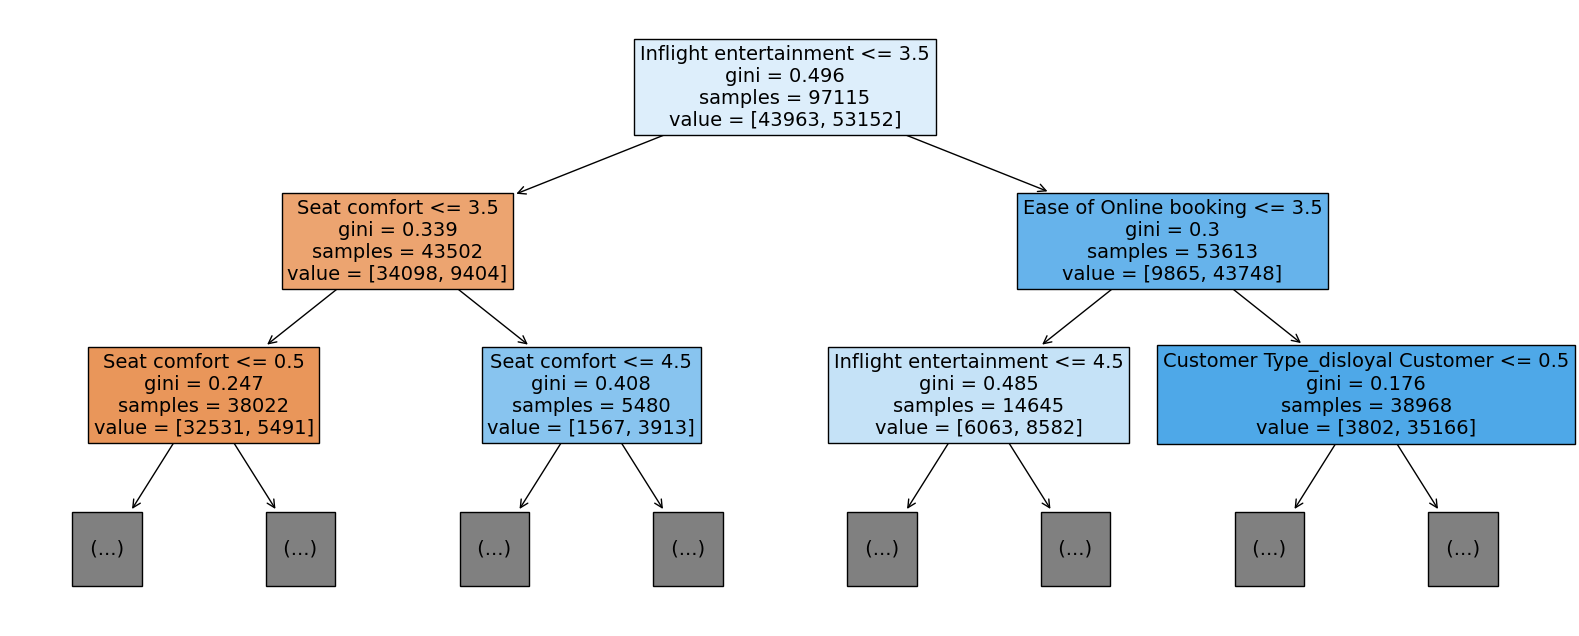

In [108]:
plt.figure(figsize=(20,8))
plot_tree(decision_tree, max_depth=2, filled=True, feature_names=X.columns, fontsize=14)

<Axes: >

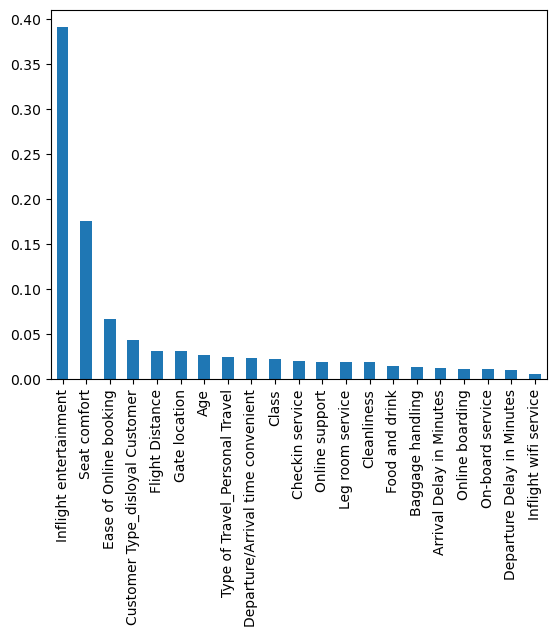

In [109]:
importance = decision_tree.feature_importances_
forset_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
forset_importance.plot.bar(ax=ax)

In [110]:
tree_para = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
            'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [111]:
tuned_decision_tree = DecisionTreeClassifier(random_state=0)
clf = GridSearchCV(tuned_decision_tree ,param_grid=tree_para, scoring=scoring, cv=5, refit='f1')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1', scoring={'precision', 'accuracy', 'recall', 'f1'})

In [112]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=18, min_samples_leaf=2, random_state=0)

In [113]:
print('Best Validation score: ', '%0.4f'% clf.best_score_)

Best Validation score:  0.9454


In [114]:
results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy'])

In [115]:
def make_results(model_name, model_object):

    cv_results = pd.DataFrame(model_object.cv_results_)

    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row.
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

 
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

result_table = make_results("Tuned Decision Tree", clf)

result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945422,0.935863,0.955197,0.940864


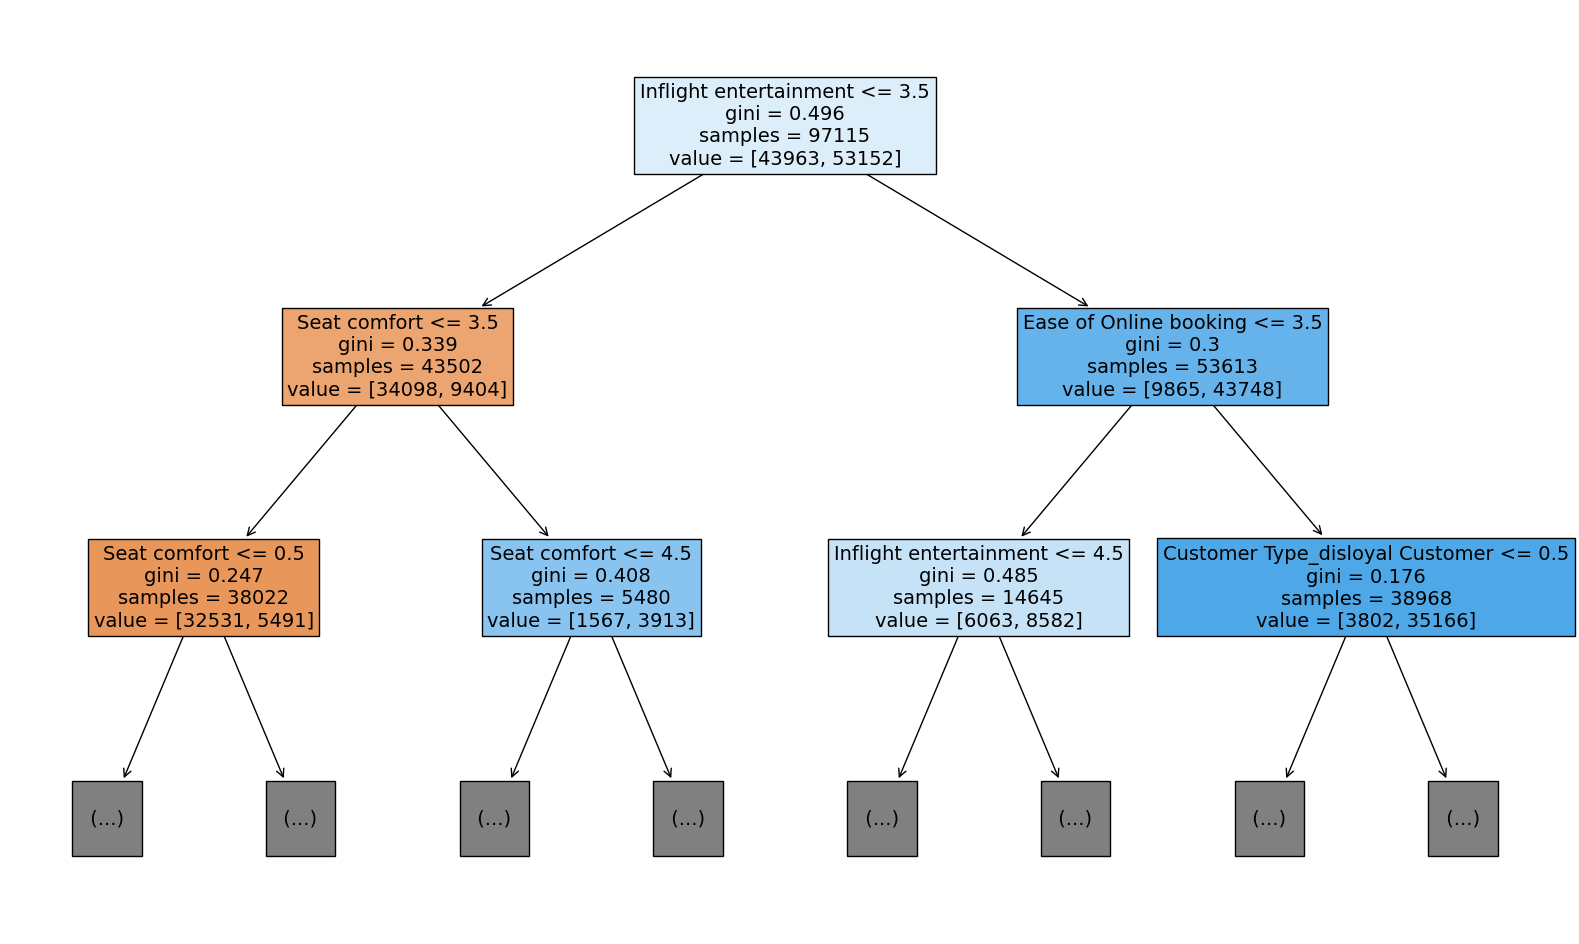

In [116]:
plt.figure(figsize=(20,12))
plot_tree(clf.best_estimator_, max_depth=2, fontsize=14, feature_names=X.columns, filled=True);

<Axes: >

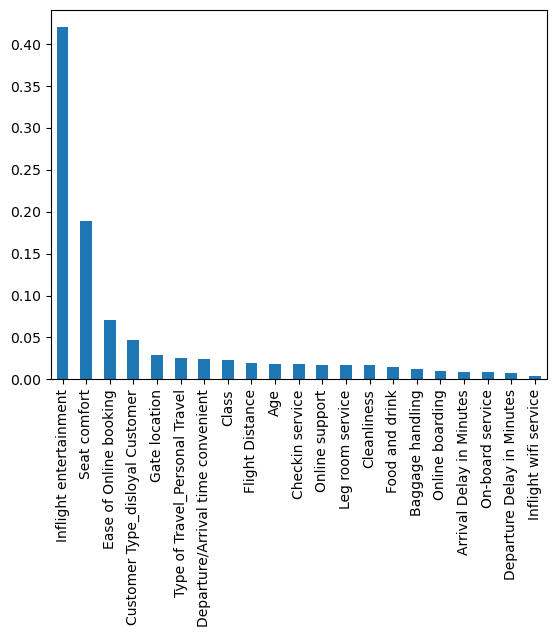

In [119]:
importance = clf.best_estimator_.feature_importances_
forset_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
forset_importance.plot.bar(ax= ax)


The feature importance graph seems to confirm that 'Inflight entertainment', 'Seat comfort', and 'Ease of Online booking' are the "most important" features for this model.